In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import ssl
import certifi
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

np.random.seed(42)
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df 

newX = np.array(california_df.drop('Price', axis=1))
newY = np.array(california_df['Price']).reshape(-1, 1)

newX = StandardScaler().fit_transform(newX)

print(f'Shape of newX: {newX.shape}, shape of newY: {newY.shape}')

Shape of newX: (20640, 8), shape of newY: (20640, 1)


In [44]:
N_train = len(newX) * .8

msk = np.random.rand(len(newX)) < 0.8

X_train, y_train = newX[msk], newY[msk]
X_test, y_test = newX[~msk], newY[~msk]

print(f"{X_train.shape=}, {X_test.shape=}")

X_train.shape=(16513, 8), X_test.shape=(4127, 8)


In [45]:
y_train.squeeze()

array([4.526, 3.521, 3.413, ..., 0.781, 0.923, 0.894], shape=(16513,))

In [46]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def ols_fit(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

def ridge_fit(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

In [47]:
w_ols = ols_fit(X_train, y_train)

train_mse_ols = mse(y_train, X_train @ w_ols)
test_mse_ols  = mse(y_test,  X_test  @ w_ols)

In [53]:
lambdas = [0.0, 0.1, 1.0, 10.0, 1000000000.0]

results = []

# OLS entry (λ = 0)
results.append({
    "Model": "OLS",
    "Lambda": 0.0,
    "Train MSE": train_mse_ols,
    "Test MSE": test_mse_ols
})

# Ridge entries
for lam in lambdas[1:]:
    w = ridge_fit(X_train, y_train, lam)
    print(f"w {w} for lam: {lam}")
    
    train_mse = mse(y_train, X_train @ w)
    test_mse  = mse(y_test,  X_test  @ w)
    
    results.append({
        "Model": "Ridge",
        "Lambda": lam,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    })

w [[ 0.83431766]
 [ 0.10706834]
 [-0.31072006]
 [ 0.36854772]
 [-0.01363885]
 [-0.04037347]
 [-0.92701086]
 [-0.89224818]] for lam: 0.1
w [[ 0.83425371]
 [ 0.10714318]
 [-0.31048937]
 [ 0.36823355]
 [-0.01361165]
 [-0.04037379]
 [-0.92629946]
 [-0.89152739]] for lam: 1.0
w [[ 0.83361073]
 [ 0.10788327]
 [-0.30819041]
 [ 0.36510812]
 [-0.01334255]
 [-0.04037659]
 [-0.91925401]
 [-0.88438822]] for lam: 10.0
w [[ 1.29947275e-05]
 [ 1.89448388e-06]
 [ 2.66160437e-06]
 [-1.08178422e-06]
 [-5.28313332e-07]
 [-4.09690931e-07]
 [-2.80267594e-06]
 [-8.22168735e-07]] for lam: 1000000000.0


In [54]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,Model,Lambda,Train MSE,Test MSE
0,OLS,0.000000e+00,4.792290,4.853017
1,Ridge,1.000000e-01,4.792290,4.853010
2,Ridge,1.000000e+00,4.792290,4.852951
3,Ridge,1.000000e+01,4.792300,4.852378
4,Ridge,1.000000e+09,5.590108,5.691891


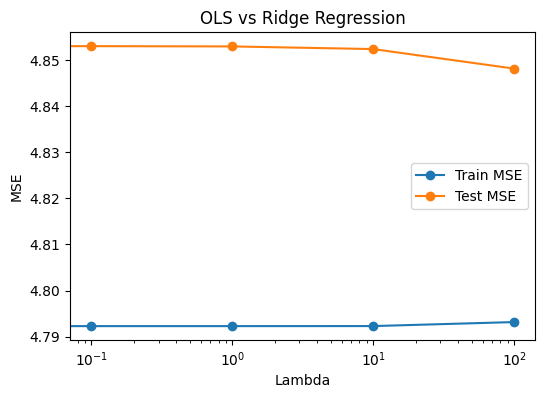

In [50]:
plt.figure(figsize=(6,4))
plt.plot(results_df["Lambda"], results_df["Train MSE"], marker="o", label="Train MSE")
plt.plot(results_df["Lambda"], results_df["Test MSE"], marker="o", label="Test MSE")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
plt.title("OLS vs Ridge Regression")
plt.show()

In [52]:
X = np.array([[1,2],[3,4]])
w = np.array([1,1]).reshape(-1,1)

X@w

array([[3],
       [7]])